In [1]:
# prompt: write code which has "team1" = "GT", "team2" = "RR", "Season" = "IPL-2022" and "date" = "29-05-2022" using the deliveries_2008_2023 and matches_2008_2023 dataset which has the similar code structure as "IPL_GT_vs_dc_analysis_2024.ipynb"

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
deliveries_df = pd.read_csv('deliveries_2008_2025.csv')
matches_df = pd.read_csv('matches_2008_2025.csv')


In [2]:
# Define the specific match details
team1 = "GT"
team2 = "RR"
season = "IPL-2022"
date = "29-05-2022" # Ensure date format matches the 'date' column in matches_df

# Find the specific match in the matches dataset
match_id = matches_df[(matches_df['team1'] == team1) &
                      (matches_df['team2'] == team2) &
                      (matches_df['Season'] == season) &
                      (matches_df['date'] == date)]['match_id'].iloc[0]

print("Unique dates in matches_df:", matches_df['date'].unique())

Unique dates in matches_df: ['22/03/2025' '23/03/2025' '24/03/2025' '25/03/2025' '26/03/2025'
 '27/03/2025' '28/03/2025' '29/03/2025' '30/03/2025' '31/03/2025'
 '4/1/2025' '4/2/2025' '4/3/2025' '4/4/2025' '4/5/2025' '4/6/2025'
 '4/7/2025' '4/8/2025' '4/9/2025' '4/10/2025' '4/11/2025' '4/12/2025'
 '13-04-2025' '14-04-2025' '15-04-2025' '16-04-2025' '17-04-2025'
 '18-04-2025' '19-04-2025' '20-04-2025' '21-04-2025' '22-04-2025'
 '23-04-2025' '24-04-2025' '25-04-2025' '26-04-2025' '27-04-2025'
 '28-04-2025' '29-04-2025' '30-04-2025' '5/1/2025' '5/2/2025' '5/3/2025'
 '5/4/2025' '5/5/2025' '5/6/2025' '5/7/2025' '17-05-2025' '18-05-2025'
 '19-05-2025' '20-05-2025' '21-05-2025' '22-05-2025' '23-05-2025'
 '24-05-2025' '25-05-2025' '26-05-2025' '27-05-2025' '29-05-2025'
 '30-05-2025' '6/1/2025' '6/3/2025' '22/3/2024' '23/3/2024' '24/3/2024'
 '25/3/2024' '26/3/2024' '27/3/2024' '28/3/2024' '29/3/2024' '30/3/2024'
 '31/3/2024' '1/4/2024' '2/4/2024' '3/4/2024' '4/4/2024' '5/4/2024'
 '6/4/2024' '7/4

In [3]:
# Filter the deliveries dataset for the specific match
match_deliveries_df = deliveries_df[deliveries_df['match_id'] == match_id]



In [4]:
print(match_deliveries_df.head())

       match_id  Season  innings batting_team bowling_team  over  ball  \
69496    202274    2022        1           RR           GT     1     1   
69497    202274    2022        1           RR           GT     1     2   
69498    202274    2022        1           RR           GT     1     3   
69499    202274    2022        1           RR           GT     1     4   
69500    202274    2022        1           RR           GT     1     5   

                batsman          bowler  wide_runs  bye_runs  noball_runs  \
69496  Yashasvi Jaiswal  Mohammed Shami          0         0            0   
69497  Yashasvi Jaiswal  Mohammed Shami          0         1            0   
69498       Jos Buttler  Mohammed Shami          0         0            0   
69499  Yashasvi Jaiswal  Mohammed Shami          0         0            0   
69500  Yashasvi Jaiswal  Mohammed Shami          0         0            0   

       batsman_runs  extras_runs  total_runs player_dismissed dismissed_by  
69496          

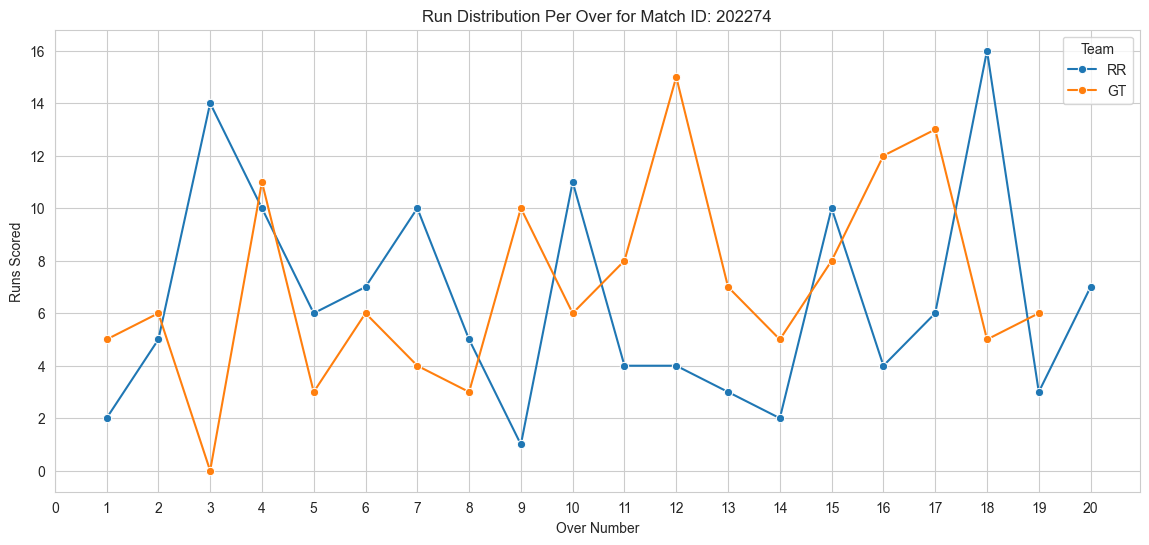

In [5]:
# Find the match_id for GT vs RR on 31-03-2023 in IPL-2023
match_row = matches_df[
	(matches_df['team1'] == team1) &
	(matches_df['team2'] == team2) &
	(matches_df['Season'] == season) &
	((matches_df['date'] == date) | (matches_df['date'] == '31-03-2023'))
]
if not match_row.empty:
	match_id = match_row.iloc[0]['match_id']
else:
	raise ValueError("Match not found for GT vs RR on 31-03-2023 in IPL-2023")

sns.set_style("whitegrid")

# data preparation for run distribution per over
run_distribution = deliveries_df.groupby(['match_id', 'innings', 'batting_team', 'over']).agg({'total_runs': 'sum'}).reset_index()

# Filter for the specific match
match_run_distribution = run_distribution[run_distribution['match_id'] == match_id]

# Rename 'batting_team' to 'team' for plotting
match_run_distribution = match_run_distribution.rename(columns={'batting_team': 'team'})

# plotting run distribution per over for both teams
plt.figure(figsize=(14, 6))
sns.lineplot(data=match_run_distribution, x='over', y='total_runs', hue='team', marker='o')
plt.title('Run Distribution Per Over for Match ID: {}'.format(match_id))
plt.xlabel('Over Number')
plt.ylabel('Runs Scored')
plt.xticks(range(0, 21))  # over numbers from 0 to 20
plt.legend(title='Team')
plt.show()

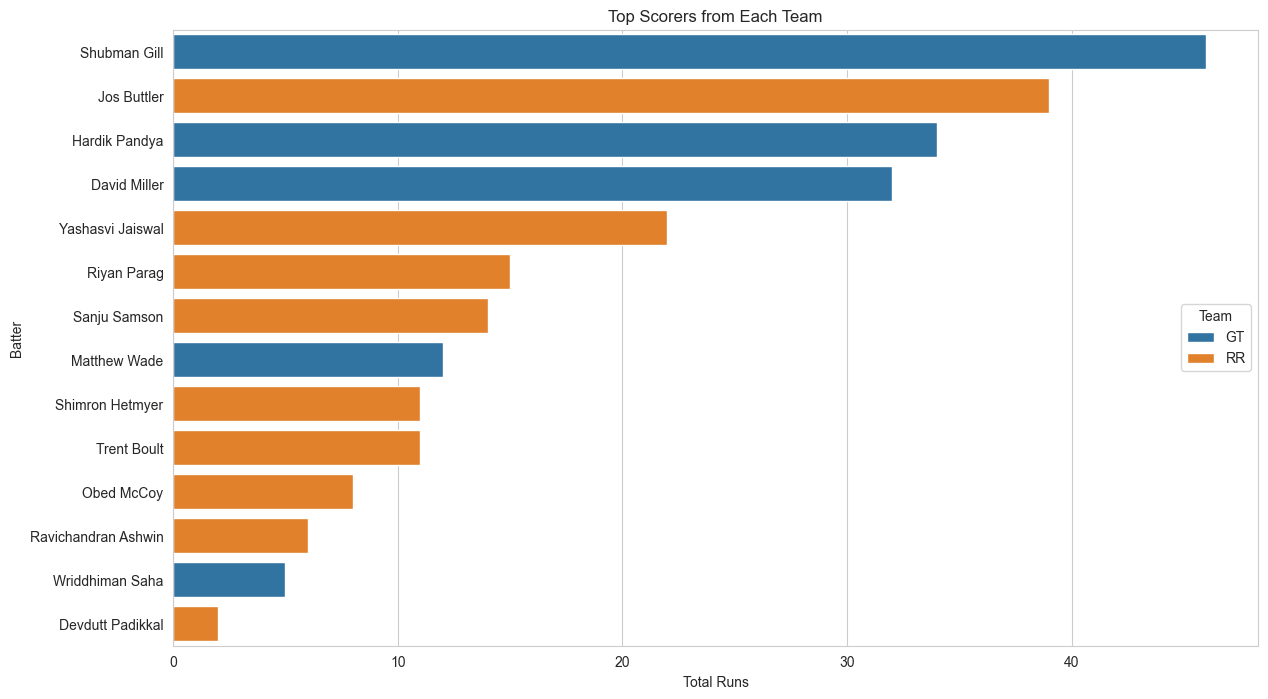

,batting_team,batsman,batsman_runs
3,GT,Shubman Gill,46
6,RR,Jos Buttler,39
1,GT,Hardik Pandya,34
0,GT,David Miller,32
13,RR,Yashasvi Jaiswal,22
9,RR,Riyan Parag,15
10,RR,Sanju Samson,14
2,GT,Matthew Wade,12
11,RR,Shimron Hetmyer,11
12,RR,Trent Boult,11


In [6]:
# calculating top scorers for each team
top_scorers = (
	match_deliveries_df.groupby(['batting_team', 'batsman'])
	.agg({'batsman_runs': 'sum'})
	.reset_index()
	.sort_values(by='batsman_runs', ascending=False)
)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_scorers, x='batsman_runs', y='batsman', hue='batting_team', dodge=False)
plt.title('Top Scorers from Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.legend(title='Team', loc='center right')
plt.show()

top_scorers

In [7]:
# preparing data for bowling analysis
# (already done in previous cells, so this is just for reference)
# Ensure 'wickets_taken' exists in match_deliveries_df

if 'wickets_taken' not in match_deliveries_df.columns:
	match_deliveries_df['wickets_taken'] = match_deliveries_df['player_dismissed'].notna().astype(int)

# Use the correct columns for bowling analysis
bowling_stats = match_deliveries_df.groupby(['bowling_team', 'bowler']).agg({
	'total_runs': 'sum',
	'wickets_taken': 'sum',
	'over': 'nunique'
}).reset_index()

bowling_stats

C:\Users\DELL\AppData\Local\Temp\ipykernel_22052\3737641703.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_deliveries_df['wickets_taken'] = match_deliveries_df['player_dismissed'].notna().astype(int)


,bowling_team,bowler,total_runs,wickets_taken,over
0,GT,Hardik Pandya,18,3,4
1,GT,Lockie Ferguson,22,0,3
2,GT,Mohammed Shami,34,2,4
3,GT,Rashid Khan,18,1,4
4,GT,Ravisrinivasan Sai Kishore,20,2,2
5,GT,Yash Dayal,18,1,3
6,RR,Obed McCoy,26,0,4
7,RR,Prasidh Krishna,40,1,4
8,RR,Ravichandran Ashwin,32,0,3
9,RR,Trent Boult,15,1,4


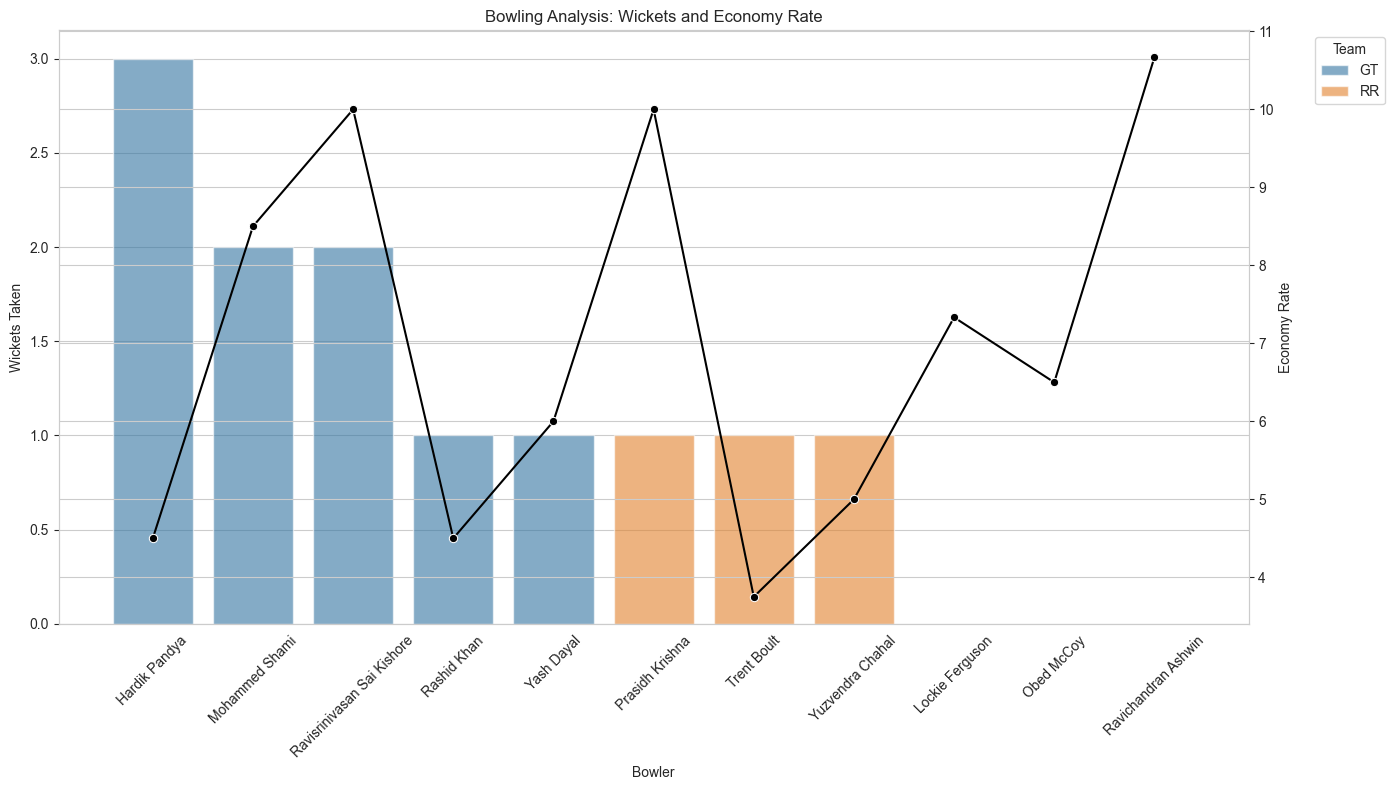

In [8]:
# Add economy rate to bowling_stats if not already present
if 'economy_rate' not in bowling_stats.columns:
    bowling_stats['economy_rate'] = bowling_stats['total_runs'] / bowling_stats['over']

# Sort for better visualization
bowling_stats_sorted = bowling_stats.sort_values(by='wickets_taken', ascending=False)

# Create the plot
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar plot for wickets
sns.barplot(data=bowling_stats_sorted, x='bowler', y='wickets_taken', hue='bowling_team', ax=ax1, alpha=0.6)
ax1.set_ylabel('Wickets Taken')
ax1.set_xlabel('Bowler')
ax1.set_title('Bowling Analysis: Wickets and Economy Rate')
ax1.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')

for item in ax1.get_xticklabels():
    item.set_rotation(45)

ax2 = ax1.twinx()
sns.lineplot(data=bowling_stats_sorted, x='bowler', y='economy_rate', marker='o', sort=False, ax=ax2, color='black')
ax2.set_ylabel('Economy Rate')

plt.tight_layout()
plt.show()

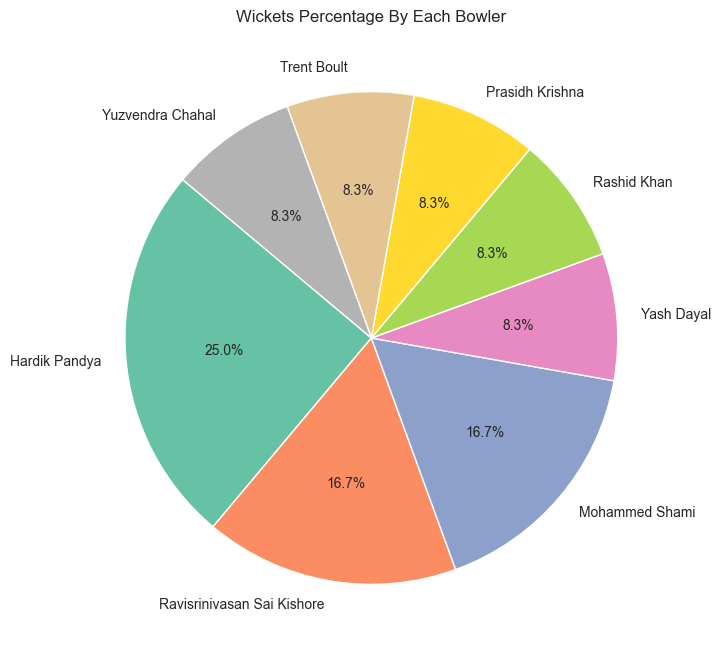

In [9]:
# counting dismissal types using the correct column
dismissal_types = match_deliveries_df['dismissed_by'].dropna().value_counts()

plt.figure(figsize=(8, 8))
plt.pie(dismissal_types, labels=dismissal_types.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Wickets Percentage By Each Bowler')
plt.show()

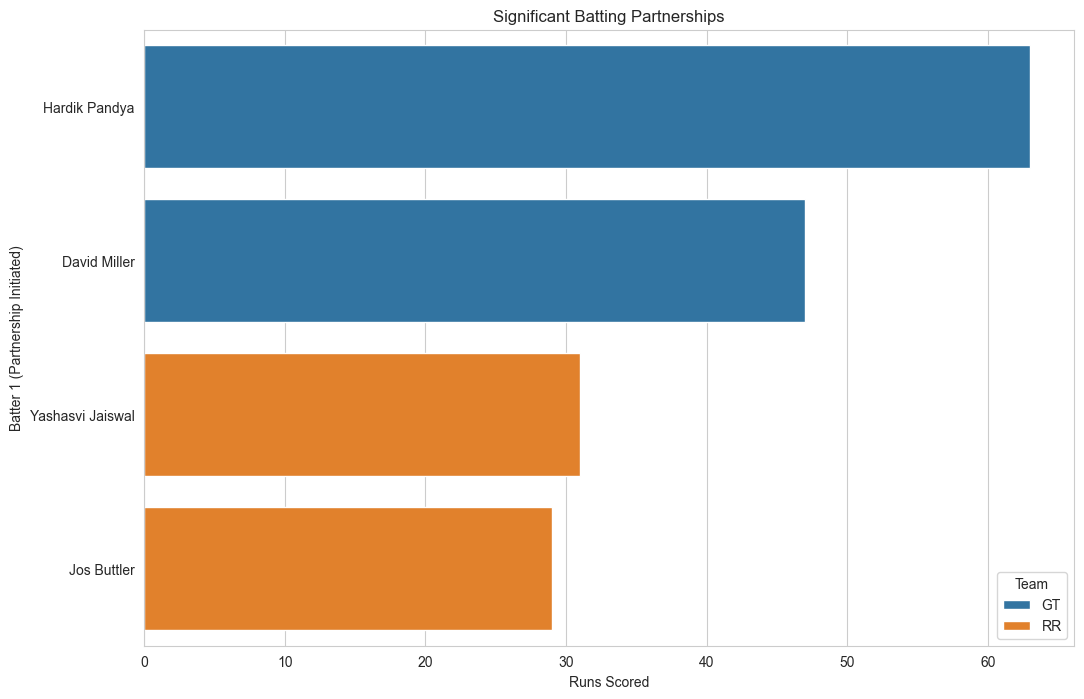

In [10]:
# function to calculate partnerships for a match
def calculate_partnerships(df):
    partnerships = []
    current_partnership = None
    prev_batsmen = set()
    for i, row in df.iterrows():
        striker = row['batsman']
        non_striker = None  # Not available in this dataset
        team = row['batting_team']
        runs = row['total_runs']
        wicket = row['player_dismissed']

        # Start new partnership if needed
        if current_partnership is None:
            current_partnership = {
                'team': team,
                'batter1': striker,
                'batter2': non_striker,
                'runs': 0,
                'balls': 0
            }
            prev_batsmen = {striker, non_striker}

        # Add runs and balls
        current_partnership['runs'] += runs
        current_partnership['balls'] += 1

        # If wicket falls, close partnership
        if pd.notna(wicket):
            partnerships.append(current_partnership)
            current_partnership = None
            prev_batsmen = set()

    # Add last partnership if not ended by wicket
    if current_partnership is not None:
        partnerships.append(current_partnership)
    return partnerships

# Calculate partnerships for the selected match
partnerships_data = calculate_partnerships(match_deliveries_df)
partnerships_df = pd.DataFrame(partnerships_data)

# Filter out significant partnerships (e.g., partnerships with more than 20 runs)
significant_partnerships = partnerships_df[partnerships_df['runs'] > 20]

# Sort by highest runs
significant_partnerships = significant_partnerships.sort_values(by='runs', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=significant_partnerships, x='runs', y='batter1', hue='team', dodge=False)
plt.title('Significant Batting Partnerships')
plt.xlabel('Runs Scored')
plt.ylabel('Batter 1 (Partnership Initiated)')
plt.legend(title='Team')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22052\1756120926.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_deliveries_df['phase'] = match_deliveries_df['over'].apply(classify_phase)


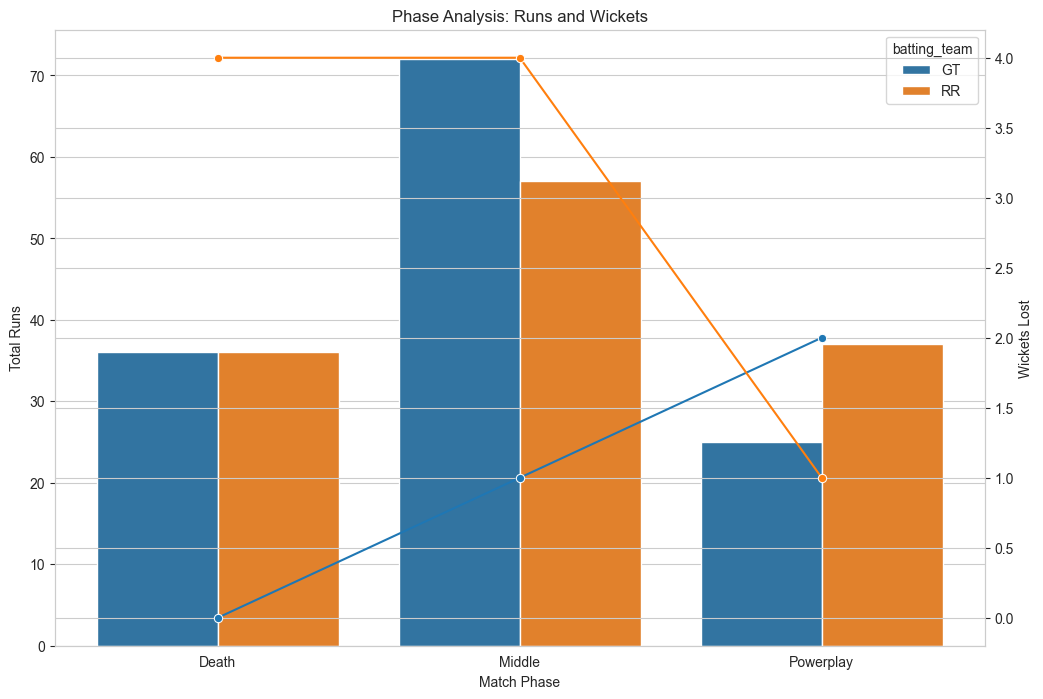

In [11]:
# function to classify the phase of the game based on the over number
def classify_phase(over):
    if over < 6:
        return 'Powerplay'
    elif over < 16:
        return 'Middle'
    else:
        return 'Death'

# adding phase information to the dataframe
match_deliveries_df['phase'] = match_deliveries_df['over'].apply(classify_phase)

# grouping data by phase and team to calculate runs and wickets
phase_analysis = match_deliveries_df.groupby(['batting_team', 'phase']).agg({'total_runs': 'sum', 'wickets_taken': 'sum', 'over': 'count'}).rename(columns={'over': 'balls'}).reset_index()

# calculating the run rate
phase_analysis['run_rate'] = (phase_analysis['total_runs'] / phase_analysis['balls']) * 6

# plotting the phase analysis
fig, ax1 = plt.subplots(figsize=(12, 8))

# bar plot for runs scored in each phase
sns.barplot(data=phase_analysis, x='phase', y='total_runs', hue='batting_team', ax=ax1)
ax1.set_title('Phase Analysis: Runs and Wickets')
ax1.set_ylabel('Total Runs')
ax1.set_xlabel('Match Phase')

# line plot for wickets lost
ax2 = ax1.twinx()
sns.lineplot(data=phase_analysis, x='phase', y='wickets_taken', hue='batting_team', marker='o', ax=ax2, legend=False)
ax2.set_ylabel('Wickets Lost')

plt.show()

In [12]:
# calculate runs and balls faced for each batter
batter_stats = match_deliveries_df.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'}).rename(columns={'ball': 'balls_faced'}).reset_index()

# calculate strike rate for each batter (runs per 100 balls)
batter_stats['strike_rate'] = (batter_stats['batsman_runs'] / batter_stats['balls_faced']) * 100

# sorting batters by their strike rate
batter_stats_sorted = batter_stats.sort_values(by='strike_rate', ascending=False)

# displaying calculated strike rates along with runs scored and balls faced
batter_stats_sorted.head(10)

,batsman,batsman_runs,balls_faced,strike_rate
0,David Miller,32,20,160.000000
5,Obed McCoy,8,5,160.000000
11,Trent Boult,11,7,157.142857
13,Yashasvi Jaiswal,22,16,137.500000
8,Sanju Samson,14,11,127.272727
3,Jos Buttler,39,35,111.428571
4,Matthew Wade,12,11,109.090909
10,Shubman Gill,46,43,106.976744
2,Hardik Pandya,34,32,106.250000
7,Riyan Parag,15,15,100.000000


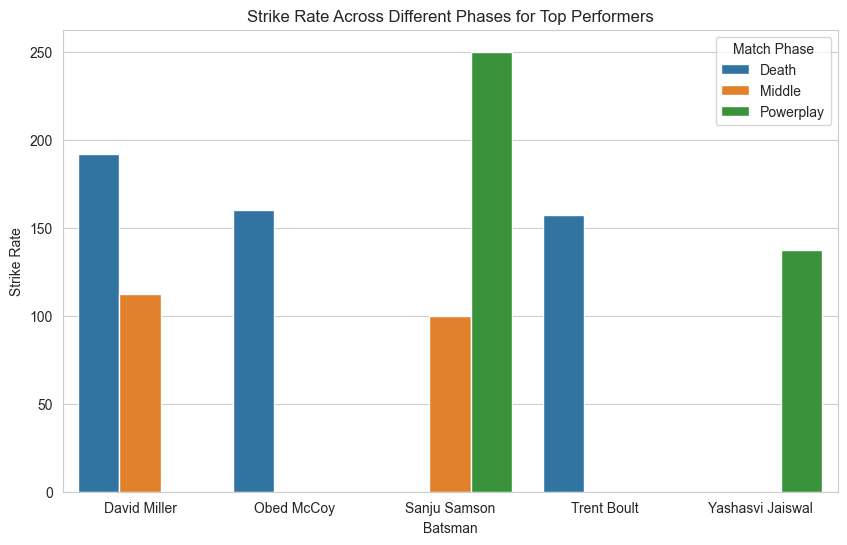

In [13]:
# merging phase information with batter stats
batter_phase_stats = match_deliveries_df.groupby(['batsman', 'phase']).agg({'batsman_runs': 'sum', 'over': 'count'}).rename(columns={'over': 'balls_faced'}).reset_index()

# calculate strike rate for each batsman-phase combination
batter_phase_stats['strike_rate'] = (batter_phase_stats['batsman_runs'] / batter_phase_stats['balls_faced']) * 100

# filtering for top performers based on overall strike rate
top_performers = batter_stats_sorted.head(5)['batsman']
batter_phase_stats_top = batter_phase_stats[batter_phase_stats['batsman'].isin(top_performers)]

# plotting strike rate across different phases for top performers
plt.figure(figsize=(10, 6))
sns.barplot(data=batter_phase_stats_top, x='batsman', y='strike_rate', hue='phase')
plt.title('Strike Rate Across Different Phases for Top Performers')
plt.xlabel('Batsman')
plt.ylabel('Strike Rate')
plt.legend(title='Match Phase')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_22052\1796630915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_deliveries_df['cumulative_runs'] = match_deliveries_df.groupby('batting_team')['total_runs'].cumsum()
C:\Users\DELL\AppData\Local\Temp\ipykernel_22052\1796630915.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_deliveries_df['cumulative_wickets'] = match_deliveries_df.groupby('batting_team')['wickets_taken'].cumsum()


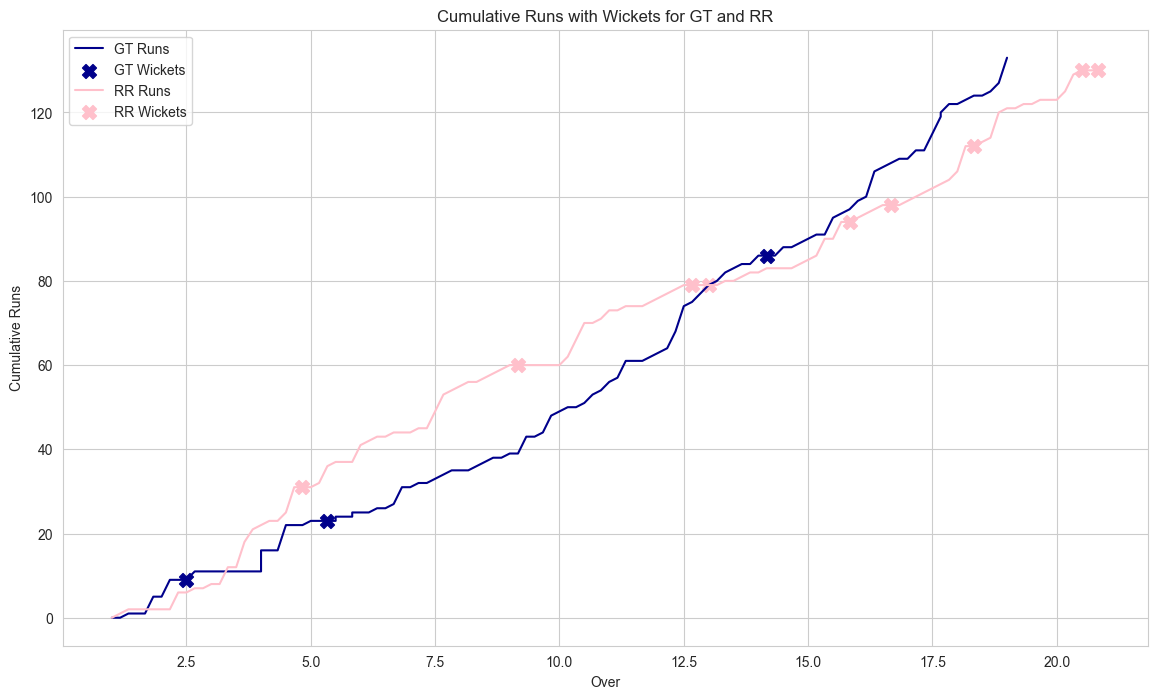

In [14]:
# calculate cumulative runs and wickets for each ball for both teams
match_deliveries_df['cumulative_runs'] = match_deliveries_df.groupby('batting_team')['total_runs'].cumsum()
match_deliveries_df['cumulative_wickets'] = match_deliveries_df.groupby('batting_team')['wickets_taken'].cumsum()

# separate data for both teams
team1_deliveries = match_deliveries_df[match_deliveries_df['batting_team'] == 'GT'].copy()
team2_deliveries = match_deliveries_df[match_deliveries_df['batting_team'] == 'RR'].copy()

# calculating overs for cumulative analysis
team1_deliveries['over_ball'] = team1_deliveries['over'] + (team1_deliveries['ball'] - 1) / 6
team2_deliveries['over_ball'] = team2_deliveries['over'] + (team2_deliveries['ball'] - 1) / 6

# plotting cumulative run rates and wickets
fig, ax = plt.subplots(figsize=(14, 8))

# plot for GT
ax.plot(team1_deliveries['over_ball'], team1_deliveries['cumulative_runs'], color='darkblue', label='GT Runs')
ax.scatter(team1_deliveries[team1_deliveries['wickets_taken'] == 1]['over_ball'], team1_deliveries[team1_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='darkblue', marker='X', s=100, label='GT Wickets')

# plot for RR
ax.plot(team2_deliveries['over_ball'], team2_deliveries['cumulative_runs'], color='pink', label='RR Runs')
ax.scatter(team2_deliveries[team2_deliveries['wickets_taken'] == 1]['over_ball'], team2_deliveries[team2_deliveries['wickets_taken'] == 1]['cumulative_runs'], color='pink', marker='X', s=100, label='RR Wickets')

ax.set_title('Cumulative Runs with Wickets for GT and RR')
ax.set_xlabel('Over')
ax.set_ylabel('Cumulative Runs')
ax.legend()
plt.show()

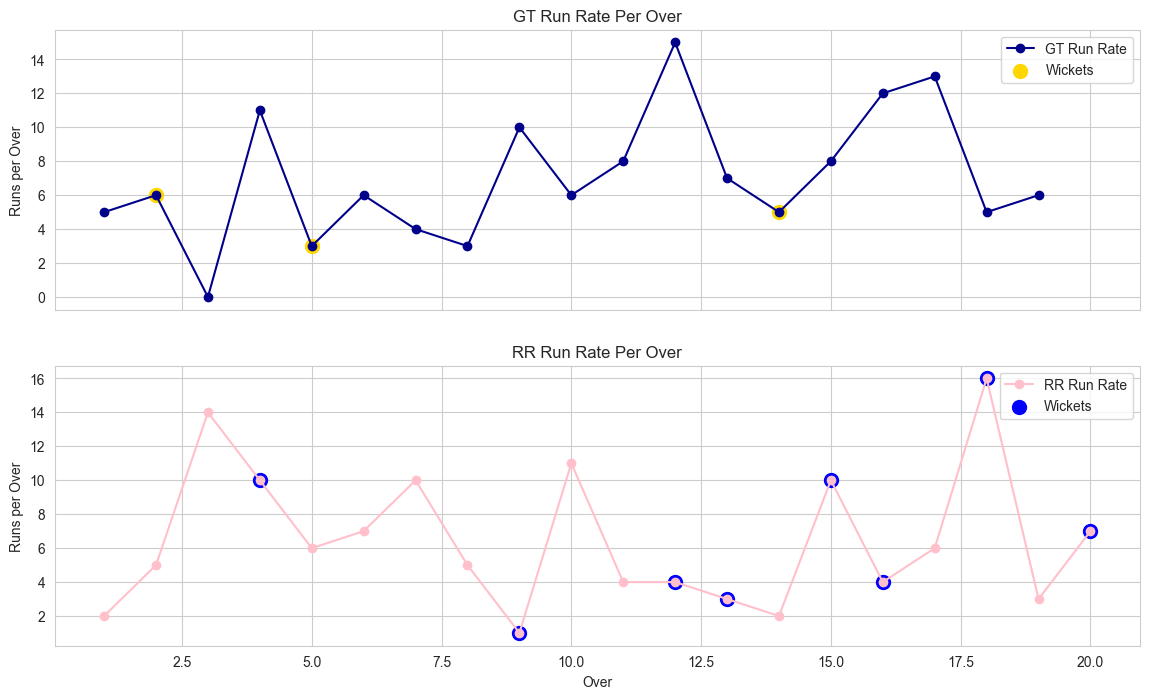

In [15]:
# calculate runs and wickets per over for both teams
per_over_stats = match_deliveries_df.groupby(['batting_team', 'over']).agg({'total_runs': 'sum', 'wickets_taken': 'sum'}).reset_index()

# calculate run rate for each over (runs per over)
per_over_stats['run_rate'] = per_over_stats['total_runs']  # runs per over

# separate data for GT and RR for plotting
team1_per_over_stats = per_over_stats[per_over_stats['batting_team'] == 'GT']
team2_per_over_stats = per_over_stats[per_over_stats['batting_team'] == 'RR']

# plotting run rates and marking wickets for each team
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)


ax1.plot(team1_per_over_stats['over'], team1_per_over_stats['run_rate'], marker='o', color='darkblue', label='GT Run Rate')
ax1.scatter(team1_per_over_stats[team1_per_over_stats['wickets_taken'] > 0]['over'], team1_per_over_stats[team1_per_over_stats['wickets_taken'] > 0]['run_rate'], color='gold', s=100, label='Wickets')
ax1.set_title('GT Run Rate Per Over')
ax1.set_ylabel('Runs per Over')
ax1.legend()


ax2.plot(team2_per_over_stats['over'], team2_per_over_stats['run_rate'], marker='o', color='pink', label='RR Run Rate')
ax2.scatter(team2_per_over_stats[team2_per_over_stats['wickets_taken'] > 0]['over'], team2_per_over_stats[team2_per_over_stats['wickets_taken'] > 0]['run_rate'], color='blue', s=100, label='Wickets')
ax2.set_title('RR Run Rate Per Over')
ax2.set_xlabel('Over')
ax2.set_ylabel('Runs per Over')
ax2.legend()

plt.show()